# 4.2. Classificação

## 1. Utilizando o dataset fornecido, obtenha modelos de classificação para prever o risco de obesidade de cada indivíduo. 
Os modelos desenvolvidos devem ser avaliados utilizando o método de k-fold cross validation. Devem apresentar como resultados a média e desvio padrão da métrica que considerem mais adequada ao problema em análise. Os métodos a utilizar são os seguintes: 
- Árvores de Decisão: Utilizando a função DecisionTreeClassifier desenvolva um
modelo de classificação que responda ao problema proposto. Deve fazer o ajuste
dos parâmetros do modelo, de forma a garantir que não está a ocorrer
overfitting nos dados de treino; <br><br>
- SVM: Utilizando a função SVC desenvolva um modelo de classificação que
responda ao problema proposto. Deve testar todos os Kernels possíveis, e fazer
ajuste de parâmetros, de forma a garantir que não está a ocorrer overfitting nos
dados de treino. No final, deve identificar o modelo com o melhor desempenho,
justificando;<br><br>
- Rede Neuronal: Utilizando o package do Keras, deve desenvolver um modelo de
classificação que responda ao problema proposto. Deve fazer uma otimização da
arquitetura e dos parâmetros do modelo. No final deve apresentar a arquitetura
encontrada, e os parâmetros escolhidos, tentando justificar as escolhas
efetuadas durante o processo de otimização;<br><br>
- K-vizinhos-mais-próximos: Utilizando a função KNeighborsClassifier desenvolva
um modelo de classificação que responda ao problema proposto. Deve fazer o
ajuste dos parâmetros do modelo, de forma a otimizar o seu desempenho. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import backend
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [2]:
# Carregando o conjunto de dados
data = pd.read_csv("../Dataset/Dados_Trabalho_TP2.csv", index_col=0)

# Separando variáveis e rótulos
X = data.drop("Label", axis=1)
y = data["Label"]

In [3]:
# Codificando os rótulos
le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

In [4]:
# Normalizando os dados
# A fórmula utilizada subtrai o valor mínimo de cada feature do valor máximo e divide o resultado pela 
# diferença entre o máximo e o mínimo. Isso garante que todos os valores fiquem entre 0 e 1.
X = (X - X.min()) / (X.max() - X.min())

In [5]:
# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [6]:
# Convert to NumPy arrays
# Converter o DataFrame Pandas X_test em um array NumPy garante o formato de dados esperado pela função KNeighborsClassifier.
# Os DataFrames Pandas não garantem a disposição C-contígua da memória.

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [7]:
# Mostar o shape dos dados
X_train.shape, X_test.shape

((1477, 16), (634, 16))

## Implementação dos modelos

### Árvores de Decisão

In [8]:
# Criando o modelo de árvore de decisão
# Random_state é uma semente de número aleatório que garante que o modelo sempre produzirá os mesmos resultados.
clf_DecisionTree = DecisionTreeClassifier(random_state=42)

# Treinando o modelo de árvore de decisão
clf_DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5426165471311475, 0.96875, 'Peso <= 0.531\ngini = 0.86\nsamples = 1477\nvalue = [237, 160, 140, 33, 9, 257, 193, 233, 215]\nclass = Peso_Normal'),
 Text(0.2611210724043716, 0.90625, 'Peso <= 0.139\ngini = 0.811\nsamples = 979\nvalue = [237, 159, 140, 33, 9, 180, 0, 6, 215]\nclass = Peso_Normal'),
 Text(0.11048497267759563, 0.84375, 'Altura <= 0.325\ngini = 0.629\nsamples = 299\nvalue = [5, 0, 137, 33, 9, 0, 0, 0, 115]\nclass = Peso_Normal'),
 Text(0.06830601092896176, 0.78125, 'Peso <= 0.038\ngini = 0.56\nsamples = 167\nvalue = [5, 0, 52, 12, 1, 0, 0, 0, 97]\nclass = Peso_Normal'),
 Text(0.040983606557377046, 0.71875, 'FCV <= 0.269\ngini = 0.455\nsamples = 69\nvalue = [0, 0, 49, 12, 1, 0, 0, 0, 7]\nclass = Peso_Normal'),
 Text(0.02185792349726776, 0.65625, 'Peso <= 0.012\ngini = 0.684\nsamples = 15\nvalue = [0, 0, 3, 6, 1, 0, 0, 0, 5]\nclass = Excesso_Peso_Grau_I'),
 Text(0.01092896174863388, 0.59375, 'Altura <= 0.101\ngini = 0.245\nsamples = 7\nvalue = [0, 0, 0, 6, 1, 0, 0, 0,

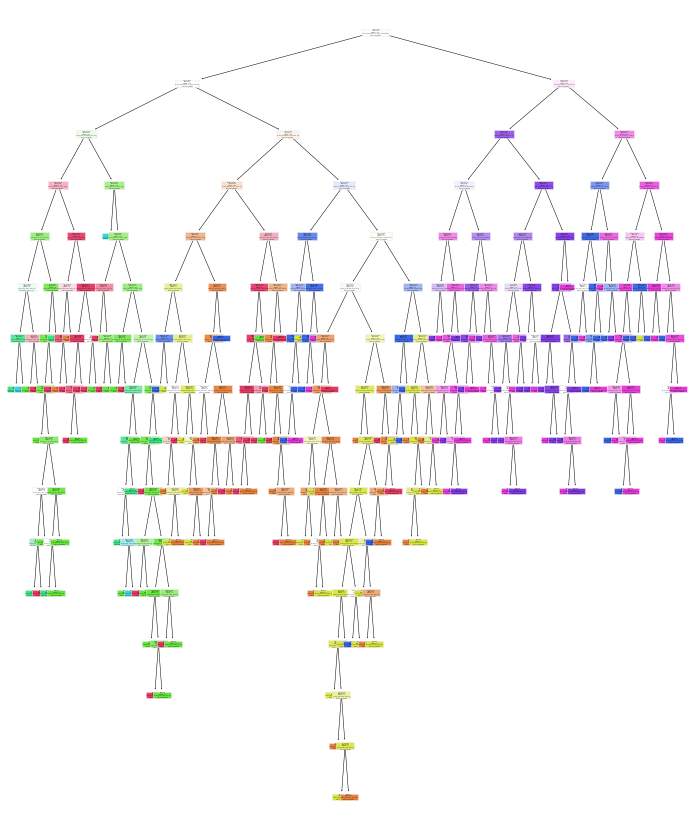

In [9]:
# Visualizar a árvore de decisão
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree, export_text
from IPython.display import Image

# Visualizar a árvore de decisão
plt.style.use('ggplot')
plt.figure(figsize=(12, 15))
plot_tree(clf_DecisionTree, feature_names= list(data.columns), class_names=list(data['Label']),filled=True)

In [10]:
# Avaliando o modelo de árvore de decisão
y_pred = clf_DecisionTree.predict(X_test)

In [11]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais. 
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='accuracy')
mean_accuracy_DecisionTree = scores.mean().round(4)
std_accuracy_DecisionTree = scores.std().round(4)
scores_DecisionTree = scores
print(f"Acurácia média: {mean_accuracy_DecisionTree}")
print(f"Desvio padrão: {std_accuracy_DecisionTree}")
print(f"Scores: {scores_DecisionTree}")

# Recall, Precision e F1 (Exercício 1.b)
scores_recall = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='f1_weighted')
recall_DecisionTree = scores_recall.mean().round(4)
precision_DecisionTree = scores_precision.mean().round(4)
f1_DecisionTree = scores_f1.mean().round(4)

print(f"Recall: {recall_DecisionTree}")
print(f"Precision: {precision_DecisionTree}")
print(f"F1: {f1_DecisionTree}")

Acurácia média: 0.8527
Desvio padrão: 0.0834
Scores: [0.76415094 0.81990521 0.88625592 0.90521327 0.90995261 0.88625592
 0.93364929 0.91943128 0.85308057 0.6492891 ]
Recall: 0.8527
Precision: 0.8666
F1: 0.8521


c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

#### Linear

In [12]:
# Criando o modelo de SVM com kernel linear
# O gamma atua como um fator de regularização que controla a influência de cada ponto de dados de treinamento (vetor de suporte) 
# na construção da fronteira de decisão.
# O valor 'auto' é igual a 1/n_features.
clf_SVM_Linear = SVC(kernel='linear', gamma='auto')

# Treinando o modelo de SVM com kernel linear
clf_SVM_Linear.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [13]:
# Predição do modelo de SVM com kernel linear
y_pred = clf_SVM_Linear.predict(X_test)

In [14]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais.
# O modelo será treinado em 9 partes e testado na parte restante.
scores_accuracy = cross_val_score(clf_SVM_Linear, X, y, cv=10, scoring='accuracy')

# Acurácia (Exercício 1.a)
mean_accuracy_SVM_Linear = scores_accuracy.mean().round(4)
std_accuracy_SVM_Linear = scores_accuracy.std().round(4)
scores_SVM_Linear = scores_accuracy
print(f"Acurácia média: {mean_accuracy_SVM_Linear}")
print(f"Desvio padrão: {std_accuracy_SVM_Linear}")
print(f"Scores: {scores_SVM_Linear}")

Acurácia média: 0.7821
Desvio padrão: 0.1229
Scores: [0.71226415 0.7014218  0.81990521 0.86255924 0.82938389 0.90995261
 0.87203791 0.86729858 0.77725118 0.46919431]


#### Poly

In [15]:
# Criando o modelo de SVM com kernel polinomial
# O gamma atua como um fator de regularização que controla a influência de cada ponto de dados de treinamento (vetor de suporte) 
# na construção da fronteira de decisão.
# O valor 'auto' é igual a 1/n_features.
clf_SVM_Poly = SVC(kernel='poly', gamma='auto')

# Treinando o modelo de SVM com kernel polinomial
clf_SVM_Poly.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [16]:
# Predição do modelo de SVM com kernel polinomial 
y_pred = clf_SVM_Poly.predict(X_test)

In [17]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais.
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_SVM_Poly, X, y, cv=10)
mean_accuracy_SVM_Poly = scores.mean().round(4)
std_accuracy_SVM_Poly = scores.std().round(4)
scores_SVM_Poly = scores
print(f"Acurácia média: {mean_accuracy_SVM_Poly}")
print(f"Desvio padrão: {std_accuracy_SVM_Poly}")
print(f"Scores: {scores_SVM_Poly}")

Acurácia média: 0.5112
Desvio padrão: 0.0839
Scores: [0.44339623 0.52132701 0.58293839 0.56398104 0.57345972 0.52606635
 0.5450237  0.59241706 0.45971564 0.30331754]


#### Rbf

In [18]:
# Criando o modelo de SVM com kernel rbf
# O gamma atua como um fator de regularização que controla a influência de cada ponto de dados de treinamento (vetor de suporte) 
# na construção da fronteira de decisão.
# O valor 'auto' é igual a 1/n_features.
clf_SVM_Rbf = SVC(kernel='rbf', gamma='auto')

# Treinando o modelo de SVM com kernel rbf
clf_SVM_Rbf.fit(X_train, y_train)

SVC(gamma='auto')

In [19]:
# Predição do modelo de SVM com kernel rbf
y_pred = clf_SVM_Rbf.predict(X_test)

In [20]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais.
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_SVM_Rbf, X, y, cv=10)
mean_accuracy_SVM_Rbf = scores.mean().round(4)
std_accuracy_SVM_Rbf = scores.std().round(4)
scores_SVM_Rbf = scores
print(f"Acurácia média: {mean_accuracy_SVM_Rbf}")
print(f"Desvio padrão: {std_accuracy_SVM_Rbf}")
print(f"Scores: {scores_SVM_Rbf}")

Acurácia média: 0.6519
Desvio padrão: 0.1157
Scores: [0.55188679 0.57819905 0.71090047 0.73459716 0.72511848 0.74881517
 0.77251185 0.71563981 0.5971564  0.38388626]


#### Sigmoid

In [21]:
# Criando o modelo de SVM com kernel sigmoid
# O gamma atua como um fator de regularização que controla a influência de cada ponto de dados de treinamento (vetor de suporte) 
# na construção da fronteira de decisão.
# O valor 'auto' é igual a 1/n_features.
clf_SVM_Sigmoid = SVC(kernel='sigmoid', gamma='auto')

# Treinando o modelo de SVM com kernel sigmoid
clf_SVM_Sigmoid.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [22]:
# Predição do modelo de SVM com kernel sigmoid
y_pred = clf_SVM_Sigmoid.predict(X_test)

In [23]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais.
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_SVM_Sigmoid, X, y, cv=10)
mean_accuracy_SVM_Sigmoid = scores.mean().round(4)
std_accuracy_SVM_Sigmoid = scores.std().round(4)
scores_SVM_Sigmoid = scores
print(f"Acurácia média: {mean_accuracy_SVM_Sigmoid}")
print(f"Desvio padrão: {std_accuracy_SVM_Sigmoid}")
print(f"Scores: {scores_SVM_Sigmoid}")

Acurácia média: 0.5372
Desvio padrão: 0.0858
Scores: [0.49528302 0.49763033 0.60189573 0.58767773 0.58293839 0.57819905
 0.61611374 0.58767773 0.51184834 0.31279621]


#### Precomputed

In [24]:
# Para a criação de SVM com kernel precomputed, é necessário que a matriz passada seja quadrada.
# A entrada é uma matriz de 1477x16.

In [25]:
# Comparações entre os modelos de SVM (Acurácia média)
accuracy_score_SVM_Linear = cross_val_score(clf_SVM_Linear, X, y, cv=10).mean().round(4)
accuracy_score_SVM_Poly = cross_val_score(clf_SVM_Poly, X, y, cv=10).mean().round(4)
accuracy_score_SVM_Rbf = cross_val_score(clf_SVM_Rbf, X, y, cv=10).mean().round(4)
accuracy_score_SVM_Sigmoid = cross_val_score(clf_SVM_Sigmoid, X, y, cv=10).mean().round(4)

# Comparação entre os modelos de SVM (Desvio padrão)
desvio_padrao_SVM_Linear = cross_val_score(clf_SVM_Linear, X, y, cv=10).std().round(4)
desvio_padrao_SVM_Poly = cross_val_score(clf_SVM_Poly, X, y, cv=10).std().round(4)
desvio_padrao_SVM_Rbf = cross_val_score(clf_SVM_Rbf, X, y, cv=10).std().round(4)
desvio_padrao_SVM_Sigmoid = cross_val_score(clf_SVM_Sigmoid, X, y, cv=10).std().round(4)

# Criando tabela para comparação entre os modelos de SVM
df_resultados = pd.DataFrame({
    "Modelo": ["SVM Linear", "SVM Polinomial", "SVM RBF", "SVM Sigmoid"],
    "Acurácia Média": [accuracy_score_SVM_Linear, accuracy_score_SVM_Poly, accuracy_score_SVM_Rbf, accuracy_score_SVM_Sigmoid],
    "Desvio Padrão": [desvio_padrao_SVM_Linear, desvio_padrao_SVM_Poly, desvio_padrao_SVM_Rbf, desvio_padrao_SVM_Sigmoid]
})

# Imprimir tabela
print("\n")
print(df_resultados.to_string(index=False))




        Modelo  Acurácia Média  Desvio Padrão
    SVM Linear          0.7821         0.1229
SVM Polinomial          0.5112         0.0839
       SVM RBF          0.6519         0.1157
   SVM Sigmoid          0.5372         0.0858


In [26]:
# SVM Linear tem a maior acurácia média.
# SVM Polimonial tem o menor desvio padrão, indicando maior estabilidade.
# SVM Linear é o modelo mais indicado para este conjunto de dados.

In [27]:
# Guardar os resultados do SVM Linear para comparação com os outros modelos
mean_accuracy_SVM = accuracy_score_SVM_Linear
std_accuracy_SVM = desvio_padrao_SVM_Linear
scores_SVM = scores_SVM_Linear

# Recall, Precision e F1 do melhor SVM (Exercício 1.b)
scores_recall = cross_val_score(clf_SVM_Linear, X, y, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_SVM_Linear, X, y, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_SVM_Linear, X, y, cv=10, scoring='f1_weighted')
recall_SVM = scores_recall.mean().round(4)
precision_SVM = scores_precision.mean().round(4)
f1_SVM = scores_f1.mean().round(4)

print(f"Recall: {recall_SVM}")
print(f"Precision: {precision_SVM}")
print(f"F1: {f1_SVM}")


c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

Recall: 0.7821
Precision: 0.7789
F1: 0.7673


### Rede Neuronal

In [28]:
# Criando o modelo de MLP com 1 camada de entrada, 1 camada oculta e 1 camada de saída
# A camada de entrada tem 16 neurônios, a camada oculta tem 16 neurônios e a camada de saída tem 9 neurônios.
# A função de ativação da camada de entrada e da camada oculta é a função ReLU (Rectified Linear Unit) 
# e a função de ativação da camada de saída é a função softmax.
# A função softmax é utilizada em problemas de classificação multiclasse. Ela transforma os valores de saída
# da rede neural em probabilidades. A classe com maior probabilidade é a classe prevista pelo modelo.


clf_MLP_1 = keras.Sequential([
                        keras.layers.Flatten(input_shape=(16,)),
                        keras.layers.Dense(16, activation='relu'),
                        keras.layers.Dense(9, activation='softmax')
])

In [29]:
# Compilando o modelo de MLP
clf_MLP_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
print(clf_MLP_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 9)                 153       
                                                                 
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# Avaliação do modelo segundo o método de k-fold cross validation

# Definindo o número de folds
num_folds = 10
# Definindo o objeto de validação cruzada
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
recall_per_fold = []
precision_per_fold = []
f1_per_fold = []

for train, test in kfold.split(X_train, y_train):

    # Treinando o modelo de MLP, validando em 10% dos dados
    history = clf_MLP_1.fit(X_train, y_train, validation_split=0.1, epochs=30)
    
    # Avaliando o modelo segundo a métrica de acurácia
    scores = clf_MLP_1.evaluate(X_train, y_train, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])

    # Predição do modelo de MLP
    y_pred = clf_MLP_1.predict(X_test)
    # Convertendo as probabilidades em classes
    y_pred_classes = [np.argmax(element) for element in y_pred]
    
    # Avaliação do modelo segundo as métricas de recall, precision e f1 (Exercício 1.b)
    recall_per_fold.append(recall_score(y_test, y_pred_classes, average='weighted'))
    precision_per_fold.append(precision_score(y_test, y_pred_classes, average='weighted'))
    f1_per_fold.append(f1_score(y_test, y_pred_classes, average='weighted'))
    
    fold_no += 1

mean_accuracy_MLP_1 = np.mean(acc_per_fold).round(4)
std_accuracy_MLP_1 = np.std(acc_per_fold).round(4)
scores_MLP_1 = acc_per_fold
precision_MLP_1 = np.mean(precision_per_fold).round(4)
recall_MLP_1 = np.mean(recall_per_fold).round(4)
f1_MLP_1 = np.mean(f1_per_fold).round(4)

print(f"Acurácia média: {mean_accuracy_MLP_1}")
print(f"Desvio padrão: {std_accuracy_MLP_1}")
print(f"Scores: {scores_MLP_1}")
print(f"Loss médio: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})")

Epoch 1/30


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


42/42 [==============================] - 1s 5ms/step - loss: 2.3346 - accuracy: 0.0933 - val_loss: 2.2393 - val_accuracy: 0.1081
Epoch 2/30
42/42 [==============================] - 0s 2ms/step - loss: 2.1473 - accuracy: 0.1550 - val_loss: 2.1362 - val_accuracy: 0.1486
Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 2.0477 - accuracy: 0.2084 - val_loss: 2.0406 - val_accuracy: 0.1419
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 1.9621 - accuracy: 0.2686 - val_loss: 1.9603 - val_accuracy: 0.1959
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.8865 - accuracy: 0.3115 - val_loss: 1.8991 - val_accuracy: 0.2703
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 1.8270 - accuracy: 0.3574 - val_loss: 1.8463 - val_accuracy: 0.3581
Epoch 7/30
42/42 [==============================] - 0s 3ms/step - loss: 1.7692 - accuracy: 0.4071 - val_loss: 1.7975 - val_accuracy: 0.4189
Epoch 8/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 1ms/step - loss: 1.0920 - accuracy: 0.6163 - val_loss: 1.1394 - val_accuracy: 0.6081
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0767 - accuracy: 0.6208 - val_loss: 1.1202 - val_accuracy: 0.6284
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0645 - accuracy: 0.6268 - val_loss: 1.1084 - val_accuracy: 0.6216
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0516 - accuracy: 0.6200 - val_loss: 1.0965 - val_accuracy: 0.6284
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0407 - accuracy: 0.6358 - val_loss: 1.0851 - val_accuracy: 0.6216
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0276 - accuracy: 0.6215 - val_loss: 1.0747 - val_accuracy: 0.6419
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.6396 - val_loss: 1.0612 - val_accuracy: 0.6351
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.8336 - accuracy: 0.7126 - val_loss: 0.8786 - val_accuracy: 0.7162
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.7178 - val_loss: 0.8648 - val_accuracy: 0.7095
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8213 - accuracy: 0.7299 - val_loss: 0.8592 - val_accuracy: 0.7027
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8161 - accuracy: 0.7148 - val_loss: 0.8578 - val_accuracy: 0.7162
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8117 - accuracy: 0.7223 - val_loss: 0.8515 - val_accuracy: 0.7095
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8044 - accuracy: 0.7246 - val_loss: 0.8491 - val_accuracy: 0.7230
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7988 - accuracy: 0.7344 - val_loss: 0.8405 - val_accuracy: 0.7095
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.7705 - val_loss: 0.7400 - val_accuracy: 0.7297
Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.7743 - val_loss: 0.7277 - val_accuracy: 0.7365
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.7825 - val_loss: 0.7249 - val_accuracy: 0.7365
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.7780 - val_loss: 0.7267 - val_accuracy: 0.7297
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.7803 - val_loss: 0.7215 - val_accuracy: 0.7365
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.7743 - val_loss: 0.7211 - val_accuracy: 0.7432
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.7863 - val_loss: 0.7139 - val_accuracy: 0.7297
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.8157 - val_loss: 0.6375 - val_accuracy: 0.7770
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.8187 - val_loss: 0.6362 - val_accuracy: 0.7703
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.8141 - val_loss: 0.6381 - val_accuracy: 0.7703
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.8149 - val_loss: 0.6342 - val_accuracy: 0.7703
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.8209 - val_loss: 0.6339 - val_accuracy: 0.7635
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.8224 - val_loss: 0.6289 - val_accuracy: 0.7635
Epoch 9/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.8194 - val_loss: 0.6306 - val_accuracy: 0.7635
Epoch 10/30
42/42 [============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5333 - accuracy: 0.8322 - val_loss: 0.5750 - val_accuracy: 0.7973
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.8360 - val_loss: 0.5749 - val_accuracy: 0.7838
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5303 - accuracy: 0.8360 - val_loss: 0.5775 - val_accuracy: 0.7905
Epoch 6/30
42/42 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.8375 - val_loss: 0.5744 - val_accuracy: 0.7905
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.8390 - val_loss: 0.5737 - val_accuracy: 0.7905
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5238 - accuracy: 0.8412 - val_loss: 0.5707 - val_accuracy: 0.7973
Epoch 9/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 0.8345 - val_loss: 0.5727 - val_accuracy: 0.7905
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8495 - val_loss: 0.5304 - val_accuracy: 0.8176
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8480 - val_loss: 0.5300 - val_accuracy: 0.8041
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.8488 - val_loss: 0.5333 - val_accuracy: 0.8041
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4823 - accuracy: 0.8510 - val_loss: 0.5311 - val_accuracy: 0.7973
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8503 - val_loss: 0.5304 - val_accuracy: 0.8041
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8540 - val_loss: 0.5279 - val_accuracy: 0.8041
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8473 - val_loss: 0.5299 - val_accuracy: 0.8041
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8616 - val_loss: 0.5055 - val_accuracy: 0.8243
Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8593 - val_loss: 0.4972 - val_accuracy: 0.8514
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8616 - val_loss: 0.4967 - val_accuracy: 0.8311
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8578 - val_loss: 0.5006 - val_accuracy: 0.8378
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8653 - val_loss: 0.4982 - val_accuracy: 0.8311
Epoch 7/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8638 - val_loss: 0.4974 - val_accuracy: 0.8378
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8638 - val_loss: 0.4955 - val_accuracy: 0.8243
Epoch 9/30
42/42 [=============

In [32]:
# Criando o modelo de MLP com Dropout
# A camada de entrada tem 16 neurônios, a camada oculta tem 64 neurônios e a camada de saída tem 9 neurônios.
# A função de ativação da camada de entrada e da camada oculta é a função ReLU (Rectified Linear Unit)
# e a função de ativação da camada de saída é a função softmax.
# A camada de Dropout desativa 50% dos neurônios a cada iteração.
# O Dropout é uma técnica de regularização que ajuda a evitar o overfitting.

clf_MLP_2 = keras.Sequential([
                        keras.layers.Flatten(input_shape=(16,)),
                        keras.layers.Dense(64, activation='relu'),  # Aumentado o número de neurônios
                        keras.layers.Dropout(0.5),  # Desativa 50% dos neurônios a cada iteração
                        keras.layers.Dense(9, activation='softmax')
])

In [33]:
# Compilando o modelo de MLP
clf_MLP_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
print(clf_MLP_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 585       
                                                                 
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# Avaliação do modelo segundo o método de k-fold cross validation

# Definindo o número de folds
num_folds = 10
# Definindo o objeto de validação cruzada
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
recall_per_fold = []
precision_per_fold = []
f1_per_fold = []

for train, test in kfold.split(X_train, y_train):

    # Treinando o modelo de MLP, validando em 10% dos dados
    history = clf_MLP_2.fit(X_train, y_train, validation_split=0.1, epochs=30)
    
    # Avaliando o modelo segundo a métrica de acurácia
    scores = clf_MLP_2.evaluate(X_train, y_train, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])

    # Predição do modelo de MLP
    y_pred = clf_MLP_2.predict(X_test)
    # Convertendo as probabilidades em classes
    y_pred_classes = [np.argmax(element) for element in y_pred]
    
    # Avaliação do modelo segundo as métricas de recall, precision e f1 (Exercício 1.b)
    recall_per_fold.append(recall_score(y_test, y_pred_classes, average='weighted'))
    precision_per_fold.append(precision_score(y_test, y_pred_classes, average='weighted'))
    f1_per_fold.append(f1_score(y_test, y_pred_classes, average='weighted'))
    
    fold_no += 1

mean_accuracy_MLP_2 = np.mean(acc_per_fold).round(4)
std_accuracy_MLP_2 = np.std(acc_per_fold).round(4)
scores_MLP_2 = acc_per_fold
precision_MLP_2 = np.mean(precision_per_fold).round(4)
recall_MLP_2 = np.mean(recall_per_fold).round(4)
f1_MLP_2 = np.mean(f1_per_fold).round(4)

print(f"Acurácia média: {mean_accuracy_MLP_2}")
print(f"Desvio padrão: {std_accuracy_MLP_2}")
print(f"Scores: {scores_MLP_2}")
print(f"Loss médio: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})")

Epoch 1/30


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


42/42 [==============================] - 0s 4ms/step - loss: 2.1518 - accuracy: 0.1640 - val_loss: 1.9794 - val_accuracy: 0.2635
Epoch 2/30
42/42 [==============================] - 0s 1ms/step - loss: 1.9813 - accuracy: 0.2385 - val_loss: 1.8702 - val_accuracy: 0.4257
Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 1.8691 - accuracy: 0.3002 - val_loss: 1.7888 - val_accuracy: 0.4662
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.7952 - accuracy: 0.3296 - val_loss: 1.7081 - val_accuracy: 0.4730
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.7224 - accuracy: 0.3747 - val_loss: 1.6352 - val_accuracy: 0.4932
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.6431 - accuracy: 0.4018 - val_loss: 1.5683 - val_accuracy: 0.4865
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.5701 - accuracy: 0.4349 - val_loss: 1.5041 - val_accuracy: 0.5338
Epoch 8/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.0389 - accuracy: 0.5982 - val_loss: 0.9389 - val_accuracy: 0.6824
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0104 - accuracy: 0.6185 - val_loss: 0.9227 - val_accuracy: 0.7095
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0073 - accuracy: 0.6185 - val_loss: 0.9186 - val_accuracy: 0.6824
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0022 - accuracy: 0.6260 - val_loss: 0.9037 - val_accuracy: 0.7027
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9646 - accuracy: 0.6305 - val_loss: 0.8951 - val_accuracy: 0.7027
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9610 - accuracy: 0.6411 - val_loss: 0.8857 - val_accuracy: 0.7297
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9572 - accuracy: 0.6501 - val_loss: 0.8750 - val_accuracy: 0.7162
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7679 - accuracy: 0.7186 - val_loss: 0.6877 - val_accuracy: 0.7973
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7677 - accuracy: 0.7178 - val_loss: 0.6812 - val_accuracy: 0.7838
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7758 - accuracy: 0.7028 - val_loss: 0.6812 - val_accuracy: 0.7905
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.7216 - val_loss: 0.6762 - val_accuracy: 0.7838
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.7201 - val_loss: 0.6692 - val_accuracy: 0.8108
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7520 - accuracy: 0.7223 - val_loss: 0.6609 - val_accuracy: 0.8108
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7398 - accuracy: 0.7299 - val_loss: 0.6575 - val_accuracy: 0.8041
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7540 - val_loss: 0.5581 - val_accuracy: 0.8378
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7630 - val_loss: 0.5560 - val_accuracy: 0.8311
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7637 - val_loss: 0.5492 - val_accuracy: 0.8243
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6460 - accuracy: 0.7743 - val_loss: 0.5503 - val_accuracy: 0.8378
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.7585 - val_loss: 0.5492 - val_accuracy: 0.8311
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7660 - val_loss: 0.5439 - val_accuracy: 0.8378
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.7795 - val_loss: 0.5380 - val_accuracy: 0.8311
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7938 - val_loss: 0.4730 - val_accuracy: 0.8378
Epoch 3/30
42/42 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7901 - val_loss: 0.4674 - val_accuracy: 0.8378
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5462 - accuracy: 0.8021 - val_loss: 0.4697 - val_accuracy: 0.8514
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7938 - val_loss: 0.4682 - val_accuracy: 0.8446
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.8089 - val_loss: 0.4655 - val_accuracy: 0.8378
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.8157 - val_loss: 0.4588 - val_accuracy: 0.8446
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7968 - val_loss: 0.4590 - val_accuracy: 0.8514
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.8202 - val_loss: 0.4226 - val_accuracy: 0.8581
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.8134 - val_loss: 0.4154 - val_accuracy: 0.8514
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8322 - val_loss: 0.4154 - val_accuracy: 0.8581
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.8111 - val_loss: 0.4168 - val_accuracy: 0.8716
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4980 - accuracy: 0.8157 - val_loss: 0.4147 - val_accuracy: 0.8716
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8315 - val_loss: 0.4109 - val_accuracy: 0.8649
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.8141 - val_loss: 0.4100 - val_accuracy: 0.8649
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8427 - val_loss: 0.3781 - val_accuracy: 0.8716
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8322 - val_loss: 0.3734 - val_accuracy: 0.8716
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8390 - val_loss: 0.3760 - val_accuracy: 0.8784
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8307 - val_loss: 0.3726 - val_accuracy: 0.8784
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.8277 - val_loss: 0.3769 - val_accuracy: 0.8581
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8284 - val_loss: 0.3717 - val_accuracy: 0.8851
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8322 - val_loss: 0.3694 - val_accuracy: 0.8851
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8570 - val_loss: 0.3482 - val_accuracy: 0.9054
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8299 - val_loss: 0.3476 - val_accuracy: 0.8851
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8563 - val_loss: 0.3433 - val_accuracy: 0.8851
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8555 - val_loss: 0.3409 - val_accuracy: 0.8851
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.8480 - val_loss: 0.3466 - val_accuracy: 0.8851
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8420 - val_loss: 0.3456 - val_accuracy: 0.8851
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.8585 - val_loss: 0.3400 - val_accuracy: 0.8919
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8578 - val_loss: 0.3289 - val_accuracy: 0.8986
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8442 - val_loss: 0.3204 - val_accuracy: 0.8919
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8488 - val_loss: 0.3291 - val_accuracy: 0.8784
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8510 - val_loss: 0.3198 - val_accuracy: 0.8919
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8465 - val_loss: 0.3201 - val_accuracy: 0.8919
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8616 - val_loss: 0.3255 - val_accuracy: 0.8716
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8563 - val_loss: 0.3220 - val_accuracy: 0.8851
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8495 - val_loss: 0.3108 - val_accuracy: 0.9054
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8661 - val_loss: 0.3036 - val_accuracy: 0.8851
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8713 - val_loss: 0.3048 - val_accuracy: 0.8986
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8646 - val_loss: 0.3052 - val_accuracy: 0.8919
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8555 - val_loss: 0.3036 - val_accuracy: 0.8986
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8638 - val_loss: 0.3079 - val_accuracy: 0.8851
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8503 - val_loss: 0.3057 - val_accuracy: 0.8986
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Criando o modelo de MLP com Batch Normalization
# A camada de entrada tem 16 neurônios, a camada oculta tem 64 neurônios e a camada de saída tem 9 neurônios.
# A função de ativação da camada de entrada e da camada oculta é a função ReLU (Rectified Linear Unit)
# e a função de ativação da camada de saída é a função softmax.
# A camada de Batch Normalization normaliza os valores de saída da camada anterior.
# A normalização por batch ajuda a acelerar o treinamento da rede neural.

clf_MLP_3 = keras.Sequential([
                        keras.layers.Flatten(input_shape=(16,)),
                        keras.layers.Dense(64, activation='relu'),
                        keras.layers.BatchNormalization(),  # Normalização por batch
                        keras.layers.Dense(9, activation='softmax'),
                        keras.layers.BatchNormalization(),
])

In [37]:
# Compilando o modelo de MLP
clf_MLP_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
print(clf_MLP_3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 9)                 585       
                                                                 
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
Total params: 1,965
Trainable params: 1,819
Non-traina

In [39]:
# Avaliação do modelo segundo o método de k-fold cross validation

# Definindo o número de folds
num_folds = 10
# Definindo o objeto de validação cruzada
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
recall_per_fold = []
precision_per_fold = []
f1_per_fold = []

for train, test in kfold.split(X_train, y_train):

    # Treinando o modelo de MLP, validando em 10% dos dados
    history = clf_MLP_3.fit(X_train, y_train, validation_split=0.1, epochs=30)
    
    # Avaliando o modelo segundo a métrica de acurácia
    scores = clf_MLP_3.evaluate(X_train, y_train, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])

    # Predição do modelo de MLP
    y_pred = clf_MLP_3.predict(X_test)
    # Convertendo as probabilidades em classes
    y_pred_classes = [np.argmax(element) for element in y_pred]
    
    # Avaliação do modelo segundo as métricas de recall, precision e f1 (Exercício 1.b)
    recall_per_fold.append(recall_score(y_test, y_pred_classes, average='weighted'))
    precision_per_fold.append(precision_score(y_test, y_pred_classes, average='weighted'))
    f1_per_fold.append(f1_score(y_test, y_pred_classes, average='weighted'))
    
    fold_no += 1

mean_accuracy_MLP_3 = np.mean(acc_per_fold).round(4)
std_accuracy_MLP_3 = np.std(acc_per_fold).round(4)
scores_MLP_3 = acc_per_fold
precision_MLP_3 = np.mean(precision_per_fold).round(4)
recall_MLP_3 = np.mean(recall_per_fold).round(4)
f1_MLP_3 = np.mean(f1_per_fold).round(4)

print(f"Acurácia média: {mean_accuracy_MLP_3}")
print(f"Desvio padrão: {std_accuracy_MLP_3}")
print(f"Scores: {scores_MLP_3}")
print(f"Loss médio: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})")

Epoch 1/30


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


42/42 [==============================] - 1s 7ms/step - loss: 9.3802 - accuracy: 0.1881 - val_loss: 2.0352 - val_accuracy: 0.0811
Epoch 2/30
42/42 [==============================] - 0s 2ms/step - loss: 7.7613 - accuracy: 0.2573 - val_loss: 2.2490 - val_accuracy: 0.1486
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 7.4312 - accuracy: 0.2573 - val_loss: 2.6179 - val_accuracy: 0.1824
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 6.9215 - accuracy: 0.2927 - val_loss: 3.0992 - val_accuracy: 0.2365
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 6.5633 - accuracy: 0.3040 - val_loss: 3.9033 - val_accuracy: 0.3514
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 6.5985 - accuracy: 0.3115 - val_loss: 4.3089 - val_accuracy: 0.3378
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 6.2186 - accuracy: 0.3348 - val_loss: 5.0956 - val_accuracy: 0.3243
Epoch 8/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.4735 - accuracy: 0.5839 - val_loss: 1.7904 - val_accuracy: 0.5743
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.5072 - accuracy: 0.5929 - val_loss: 1.6798 - val_accuracy: 0.5811
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.4945 - accuracy: 0.6020 - val_loss: 1.5953 - val_accuracy: 0.5946
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.4448 - accuracy: 0.5944 - val_loss: 1.8556 - val_accuracy: 0.5878
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.4676 - accuracy: 0.6065 - val_loss: 1.6707 - val_accuracy: 0.5676
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.4717 - accuracy: 0.5944 - val_loss: 1.7721 - val_accuracy: 0.5811
Epoch 8/30
42/42 [==============================] - 0s 3ms/step - loss: 1.4639 - accuracy: 0.5756 - val_loss: 1.7121 - val_accuracy: 0.5541
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.5489 - accuracy: 0.5463 - val_loss: 1.8694 - val_accuracy: 0.5338
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.5374 - accuracy: 0.5561 - val_loss: 1.7989 - val_accuracy: 0.5405
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.4292 - accuracy: 0.5576 - val_loss: 1.7877 - val_accuracy: 0.5405
Epoch 5/30
42/42 [==============================] - 0s 4ms/step - loss: 1.4493 - accuracy: 0.5478 - val_loss: 1.7641 - val_accuracy: 0.4595
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.5018 - accuracy: 0.5410 - val_loss: 1.8163 - val_accuracy: 0.4662
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.3524 - accuracy: 0.5455 - val_loss: 1.7012 - val_accuracy: 0.4730
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 1.3758 - accuracy: 0.5688 - val_loss: 1.6499 - val_accuracy: 0.5203
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.2774 - accuracy: 0.5786 - val_loss: 1.4374 - val_accuracy: 0.5473
Epoch 3/30
42/42 [==============================] - 0s 3ms/step - loss: 1.3185 - accuracy: 0.5658 - val_loss: 1.4583 - val_accuracy: 0.5405
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.3428 - accuracy: 0.5636 - val_loss: 1.6234 - val_accuracy: 0.5068
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.3412 - accuracy: 0.5493 - val_loss: 1.4942 - val_accuracy: 0.5338
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.3429 - accuracy: 0.5666 - val_loss: 1.4850 - val_accuracy: 0.5338
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.2759 - accuracy: 0.5636 - val_loss: 1.4816 - val_accuracy: 0.5338
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 1.2686 - accuracy: 0.5696 - val_loss: 1.4795 - val_accuracy: 0.5473
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 4ms/step - loss: 1.1709 - accuracy: 0.5982 - val_loss: 1.4825 - val_accuracy: 0.5676
Epoch 2/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1790 - accuracy: 0.6087 - val_loss: 1.4748 - val_accuracy: 0.5743
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1860 - accuracy: 0.5982 - val_loss: 1.4718 - val_accuracy: 0.5743
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1440 - accuracy: 0.6132 - val_loss: 1.4696 - val_accuracy: 0.5811
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1705 - accuracy: 0.6072 - val_loss: 1.4693 - val_accuracy: 0.5811
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1572 - accuracy: 0.6080 - val_loss: 1.4633 - val_accuracy: 0.5811
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.1277 - accuracy: 0.6117 - val_loss: 1.4614 - val_accuracy: 0.5811
Epoch 8/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.6629 - val_loss: 1.3561 - val_accuracy: 0.6622
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0148 - accuracy: 0.6569 - val_loss: 1.2550 - val_accuracy: 0.6622
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0132 - accuracy: 0.6659 - val_loss: 1.2554 - val_accuracy: 0.6689
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0143 - accuracy: 0.6674 - val_loss: 1.2540 - val_accuracy: 0.6554
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.6704 - val_loss: 1.3121 - val_accuracy: 0.6622
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9761 - accuracy: 0.6825 - val_loss: 1.3058 - val_accuracy: 0.6892
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.6810 - val_loss: 1.2940 - val_accuracy: 0.6824
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.0811 - accuracy: 0.6561 - val_loss: 1.3721 - val_accuracy: 0.6014
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0255 - accuracy: 0.6674 - val_loss: 1.4759 - val_accuracy: 0.6757
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0384 - accuracy: 0.6622 - val_loss: 1.4591 - val_accuracy: 0.6892
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9867 - accuracy: 0.6719 - val_loss: 1.4456 - val_accuracy: 0.6892
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0292 - accuracy: 0.6644 - val_loss: 1.4340 - val_accuracy: 0.6959
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9304 - accuracy: 0.6915 - val_loss: 1.3636 - val_accuracy: 0.6824
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9624 - accuracy: 0.6907 - val_loss: 1.3461 - val_accuracy: 0.6757
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.8237 - accuracy: 0.7336 - val_loss: 1.1653 - val_accuracy: 0.7500
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8231 - accuracy: 0.7216 - val_loss: 1.1503 - val_accuracy: 0.7568
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8686 - accuracy: 0.7020 - val_loss: 2.7913 - val_accuracy: 0.5473
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8648 - accuracy: 0.7163 - val_loss: 1.2734 - val_accuracy: 0.6014
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8690 - accuracy: 0.7239 - val_loss: 1.1844 - val_accuracy: 0.7162
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8105 - accuracy: 0.7254 - val_loss: 1.5194 - val_accuracy: 0.6959
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0746 - accuracy: 0.7073 - val_loss: 1.6152 - val_accuracy: 0.6486
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.7577 - val_loss: 1.2694 - val_accuracy: 0.7365
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7478 - accuracy: 0.7622 - val_loss: 1.1869 - val_accuracy: 0.7365
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7369 - accuracy: 0.7532 - val_loss: 1.2440 - val_accuracy: 0.7500
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.7743 - val_loss: 1.1372 - val_accuracy: 0.7568
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7414 - accuracy: 0.7667 - val_loss: 1.1496 - val_accuracy: 0.7568
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.7720 - val_loss: 1.2341 - val_accuracy: 0.7635
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7530 - accuracy: 0.7810 - val_loss: 1.2100 - val_accuracy: 0.7297
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# Comparação entre os modelos de MLP
df_resultados_MLP = pd.DataFrame({
    "Modelo": ["MLP 1", "MLP 2", "MLP 3"],
    "Acurácia Média": [mean_accuracy_MLP_1, mean_accuracy_MLP_2, mean_accuracy_MLP_3],
    "Desvio Padrão": [std_accuracy_MLP_1, std_accuracy_MLP_2, std_accuracy_MLP_3]
})

# Imprimir tabela
print("\n")
print(df_resultados_MLP.to_string(index=False))



Modelo  Acurácia Média  Desvio Padrão
 MLP 1          0.8034         0.0826
 MLP 2          0.8582         0.0683
 MLP 3          0.6669         0.1075


In [41]:
# Melhor modelo de MLP
# MLP 2 (Dropout) Maior acurácia média e menor desvio padrão.
mean_accuracy_MLP = mean_accuracy_MLP_2
std_accuracy_MLP = std_accuracy_MLP_2
scores_MLP = scores_MLP_2
precision_MLP = precision_MLP_2
recall_MLP = recall_MLP_2
f1_MLP = f1_MLP_2

### K-vizinhos-mais-próximos

In [42]:
# Lista de acurácias
accuracy_list = []
# Lista de k
k_list = []

# Definindo o valor máximo de k
k_max = 50
# Definindo o passo de k
k_step = 2

# Ciclo para testar diferentes valores de k
for k in range(1, k_max, k_step):
    # Criando o modelo de KNN
    clf = KNeighborsClassifier(n_neighbors=k)
    # Treinando o modelo de KNN
    clf.fit(X_train, y_train)
    # Predição do modelo de KNN
    y_pred = clf.predict(X_test)
    # Avaliando o modelo de KNN segundo a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    # Adicionando a acurácia à lista de acurácias
    accuracy_list.append(accuracy)

    # Adicionando o valor de k à lista de k
    k_list.append(k)

    print(f"k = {k}, accuracy = {accuracy}")

k = 1, accuracy = 0.7192429022082019
k = 3, accuracy = 0.7239747634069401
k = 5, accuracy = 0.7208201892744479
k = 7, accuracy = 0.7018927444794952
k = 9, accuracy = 0.6876971608832808
k = 11, accuracy = 0.6735015772870663
k = 13, accuracy = 0.6656151419558359
k = 15, accuracy = 0.6750788643533123
k = 17, accuracy = 0.668769716088328
k = 19, accuracy = 0.6577287066246057
k = 21, accuracy = 0.6482649842271293
k = 23, accuracy = 0.6498422712933754
k = 25, accuracy = 0.6340694006309149
k = 27, accuracy = 0.6324921135646687
k = 29, accuracy = 0.6277602523659306
k = 31, accuracy = 0.6214511041009464
k = 33, accuracy = 0.6151419558359621
k = 35, accuracy = 0.6167192429022083
k = 37, accuracy = 0.613564668769716
k = 39, accuracy = 0.6088328075709779
k = 41, accuracy = 0.6009463722397477
k = 43, accuracy = 0.5993690851735016
k = 45, accuracy = 0.5962145110410094
k = 47, accuracy = 0.5930599369085173
k = 49, accuracy = 0.580441640378549


In [43]:
# Encontrando o melhor valor de k
best_k = k_list[accuracy_list.index(max(accuracy_list))]
print(f"Melhor valor de k: {best_k}")

# Criando o modelo de KNN com o melhor valor de k
clf_Knn = KNeighborsClassifier(n_neighbors=best_k)
# Treinando o modelo de KNN com o melhor valor de k (Exercício 1.a)
scores = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='accuracy')
mean_accuracy_Knn = scores.mean().round(4)
std_accuracy_Knn = scores.std().round(4)
scores_Knn = scores
print(f"Acurácia média: {mean_accuracy_Knn}")
print(f"Desvio padrão: {std_accuracy_Knn}")
print(f"Scores: {scores_Knn}")


# Recall, Precision e F1 do melhor KNN (Exercício 1.b)
scores_recall = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='f1_weighted')
recall_knn = scores_recall.mean().round(4)
precision_knn = scores_precision.mean().round(4)
f1_knn = scores_f1.mean().round(4)
print(f"Recall: {recall_knn}")
print(f"Precision: {precision_knn}")
print(f"F1: {f1_knn}")

Melhor valor de k: 3
Acurácia média: 0.6988
Desvio padrão: 0.0393
Scores: [0.7027027  0.74324324 0.66216216 0.64864865 0.63513514 0.71621622
 0.67567568 0.73469388 0.71428571 0.75510204]


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Preci

Recall: 0.6988
Precision: 0.6999
F1: 0.687


## Alínea A
Verifique se existe diferença significativa no desempenho dos dois melhores
modelos obtidos anteriormente (use um nível de significância de 5%).
Identifique o modelo que apresenta o melhor desempenho.<br>

In [44]:
# Criando tabela para comparação entre os modelos de SVM
df_resultados_Modelos = pd.DataFrame({
    "Modelo": ["Decision Tree", "SVM", "MLP", "KNN"],
    "Acurácia Média": [mean_accuracy_DecisionTree,mean_accuracy_SVM,mean_accuracy_MLP,mean_accuracy_Knn],
    "Desvio Padrão": [std_accuracy_DecisionTree,std_accuracy_SVM,std_accuracy_MLP,std_accuracy_Knn]
})

# Imprimir tabela
print("\n")
print(df_resultados_Modelos.to_string(index=False))



       Modelo  Acurácia Média  Desvio Padrão
Decision Tree          0.8527         0.0834
          SVM          0.7821         0.1229
          MLP          0.8582         0.0683
          KNN          0.6988         0.0393


In [45]:
# Os dois melhores modelos são MLP e Decision Tree, com MLP tendo a maior acurácia média e menor desvio padrão.

In [46]:
from scipy import stats
nível_de_significância = 0.05

# Hipótese nula: as acurácias são iguais
# Hipótese alternativa: as acurácias são diferentes

# Teste de hipótese entre Decision Tree e MLP
t_stat, p_value = stats.ttest_rel(scores_DecisionTree, scores_MLP)
print("t-statistic: ", t_stat)
print(f"p-value: {p_value}")

if p_value < nível_de_significância:
    print("Rejeitar a hipótese nula: as acurácias são diferentes")
else:
    print("Aceitar a hipótese nula: as acurácias são iguais")




t-statistic:  -0.17154672834159856
p-value: 0.8675890430382169
Aceitar a hipótese nula: as acurácias são iguais


## Alínea B
Compare os resultados dos modelos anteriores. Discuta em detalhe qual o
modelo que apresentou melhor e pior desempenho de acordo com as seguintes
métricas: Accuracy; Sensitivity; Specificity e F1.<br>

In [47]:
df_resultados_Metricas = pd.DataFrame({
    "Modelo": ["Decision Tree", "SVM", "MLP", "KNN"],
    "Acurácia Média": [mean_accuracy_DecisionTree,mean_accuracy_SVM,mean_accuracy_MLP,mean_accuracy_Knn],
    "Sensibilidade": [recall_DecisionTree,recall_SVM,recall_MLP,recall_knn],
    "Especificidade": [precision_DecisionTree,precision_SVM,precision_MLP,precision_knn],
    "F1": [f1_DecisionTree,f1_SVM,f1_MLP,f1_knn]
})

# Imprimir tabela
print("\n")
print(df_resultados_Metricas.to_string(index=False))



       Modelo  Acurácia Média  Sensibilidade  Especificidade     F1
Decision Tree          0.8527         0.8527          0.8666 0.8521
          SVM          0.7821         0.7821          0.7789 0.7673
          MLP          0.8582         0.8399          0.8260 0.8304
          KNN          0.6988         0.6988          0.6999 0.6870


In [48]:
# A acurácia média indica a proporção de previsões corretas em relação ao total de casos avaliados.
# A sensibilidade (ou recall) mede a capacidade do modelo de identificar corretamente as ocorrências positivas.
# A especificidade (ou previsão) mede a capacidade do modelo de identificar corretamente as ocorrências negativas.
# A métrica F1 é a média harmônica entre especificidade e sensibilidade, oferecendo um balanço entre as duas.

# Melhor Desempenho
# MLP melhor acurácia média
# Decision Tree melhor sensibilidade, especificidade e F1
# Portanto, o melhor modelo é o Decision Tree

# Pior Desempenho
# KNN pior acurácia média, sensibilidade, especificidade e F1



## Alínea C
Seleção de atributos: Os modelos de classificação desenvolvidos podem obter
um melhor desempenho se utilizarem apenas alguns dos atributos disponíveis?
Avalie esta hipótese realizando uma seleção de atributos, justificando as
escolhas realizadas. Pode basear-se no diagrama de correlação obtido
anteriormente, para justificar as escolhas efetuadas. 

In [49]:
# Seleção de atributos através de Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecionando os 8 (metade) melhores atributos
# A função SelectKBest seleciona as k melhores features de acordo com um teste estatístico.
# O teste qui-quadrado (chi2) é um teste estatístico que mede a independência entre duas variáveis.
X_new = SelectKBest(chi2, k=8).fit_transform(X, y)


# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=12)


# Mostar o shape dos dados
X_train.shape, X_test.shape

((1477, 8), (634, 8))

In [50]:
# Treinando o modelo de árvore de decisão
clf_DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Árvores de Decisão

In [51]:
# Criando o modelo de árvore de decisão
# Random_state é uma semente de número aleatório que garante que o modelo sempre produzirá os mesmos resultados.
clf_DecisionTree_fs = DecisionTreeClassifier(random_state=42)

# Treinando o modelo de árvore de decisão
clf_DecisionTree_fs.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5937802542892157, 0.9736842105263158, 'Altura <= 0.531\ngini = 0.86\nsamples = 1477\nvalue = [237, 160, 140, 33, 9, 257, 193, 233, 215]\nclass = Peso_Normal'),
 Text(0.31148207720588234, 0.9210526315789473, 'Altura <= 0.139\ngini = 0.811\nsamples = 979\nvalue = [237, 159, 140, 33, 9, 180, 0, 6, 215]\nclass = Peso_Normal'),
 Text(0.14606617647058823, 0.868421052631579, 'Altura <= 0.092\ngini = 0.629\nsamples = 299\nvalue = [5, 0, 137, 33, 9, 0, 0, 0, 115]\nclass = Peso_Normal'),
 Text(0.09017156862745097, 0.8157894736842105, 'Idade <= 0.13\ngini = 0.603\nsamples = 182\nvalue = [0, 0, 103, 32, 9, 0, 0, 0, 38]\nclass = Peso_Normal'),
 Text(0.057205882352941176, 0.7631578947368421, 'Historico_obesidade_familiar <= 0.861\ngini = 0.699\nsamples = 67\nvalue = [0, 0, 27, 21, 9, 0, 0, 0, 10]\nclass = Peso_Normal'),
 Text(0.04303921568627451, 0.7105263157894737, 'Altura <= 0.074\ngini = 0.592\nsamples = 47\nvalue = [0, 0, 26, 14, 2, 0, 0, 0, 5]\nclass = Peso_Normal'),
 Text(0.03352941176

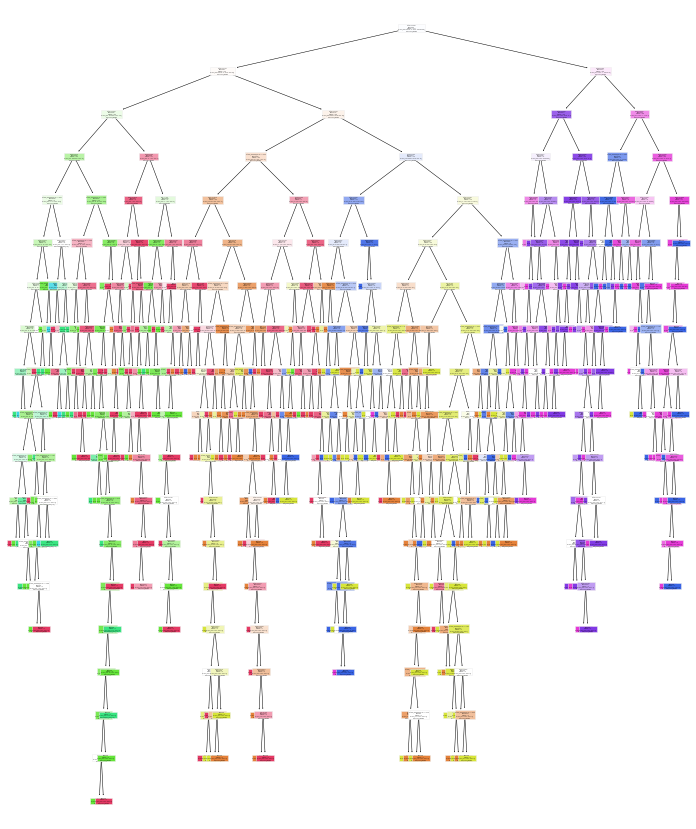

In [52]:
# Visualizar a árvore de decisão
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree, export_text
from IPython.display import Image

# Visualizar a árvore de decisão
plt.style.use('ggplot')
plt.figure(figsize=(12, 15))
plot_tree(clf_DecisionTree_fs, feature_names= list(data.columns), class_names=list(data['Label']),filled=True)

In [53]:
# Avaliando o modelo de árvore de decisão
y_pred = clf_DecisionTree_fs.predict(X_test)

In [54]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais. 
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_DecisionTree_fs, X, y, cv=10, scoring='accuracy')
mean_accuracy_DecisionTree_fs = scores.mean().round(4)
std_accuracy_DecisionTree_fs = scores.std().round(4)
scores_DecisionTree_fs = scores
print(f"Acurácia média: {mean_accuracy_DecisionTree_fs}")
print(f"Desvio padrão: {std_accuracy_DecisionTree}")
print(f"Scores: {scores_DecisionTree_fs}")

# Recall, Precision e F1 (Exercício 1.b)
scores_recall = cross_val_score(clf_DecisionTree_fs, X, y, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_DecisionTree_fs, X, y, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_DecisionTree_fs, X, y, cv=10, scoring='f1_weighted')
recall_DecisionTree_fs = scores_recall.mean().round(4)
precision_DecisionTree_fs = scores_precision.mean().round(4)
f1_DecisionTree_fs = scores_f1.mean().round(4)

print(f"Recall: {recall_DecisionTree_fs}")
print(f"Precision: {precision_DecisionTree_fs}")
print(f"F1: {f1_DecisionTree_fs}")

Acurácia média: 0.8527
Desvio padrão: 0.0834
Scores: [0.76415094 0.81990521 0.88625592 0.90521327 0.90995261 0.88625592
 0.93364929 0.91943128 0.85308057 0.6492891 ]
Recall: 0.8527
Precision: 0.8666
F1: 0.8521


c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [55]:
# Criando o modelo de SVM com kernel linear
# O gamma atua como um fator de regularização que controla a influência de cada ponto de dados de treinamento (vetor de suporte) 
# na construção da fronteira de decisão.
# O valor 'auto' é igual a 1/n_features.
clf_SVM = SVC(kernel='linear', gamma='auto')

# Treinando o modelo de SVM com kernel polinomial
clf_SVM.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [56]:
# Predição do modelo de SVM
y_pred = clf_SVM.predict(X_test)

In [57]:
# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais.
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_SVM, X, y, cv=10)
mean_accuracy_SVM_fs = scores.mean().round(4)
std_accuracy_SVM = scores.std().round(4)
scores_SVM = scores
print(f"Acurácia média: {mean_accuracy_SVM_fs}")
print(f"Desvio padrão: {std_accuracy_SVM}")
print(f"Scores: {scores_SVM}")

# Recall, Precision e F1 do melhor SVM (Exercício 1.b)
scores_recall = cross_val_score(clf_SVM, X, y, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_SVM, X, y, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_SVM, X, y, cv=10, scoring='f1_weighted')
recall_SVM_fs = scores_recall.mean().round(4)
precision_SVM_fs = scores_precision.mean().round(4)
f1_SVM_fs = scores_f1.mean().round(4)
print(f"Recall: {recall_SVM_fs}")
print(f"Precision: {precision_SVM_fs}")
print(f"F1: {f1_SVM_fs}")

Acurácia média: 0.7821
Desvio padrão: 0.1229
Scores: [0.71226415 0.7014218  0.81990521 0.86255924 0.82938389 0.90995261
 0.87203791 0.86729858 0.77725118 0.46919431]


c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

Recall: 0.7821
Precision: 0.7789
F1: 0.7673


### Rede Neuronal

In [58]:
# Criando o modelo de MLP com Dropout
# A camada de entrada tem 8 neurônios, a camada oculta tem 64 neurônios e a camada de saída tem 9 neurônios.
# A função de ativação da camada de entrada e da camada oculta é a função ReLU (Rectified Linear Unit)
# e a função de ativação da camada de saída é a função softmax.
# A camada de Dropout desativa 50% dos neurônios a cada iteração.
# O Dropout é uma técnica de regularização que ajuda a evitar o overfitting.

clf_MLP = keras.Sequential([
                        keras.layers.Flatten(input_shape=(8,)),
                        keras.layers.Dense(64, activation='relu'),  # Aumentado o número de neurônios
                        keras.layers.Dropout(0.5),  # Desativa 50% dos neurônios a cada iteração
                        keras.layers.Dense(9, activation='softmax')
])

In [59]:
# Compilando o modelo de MLP
clf_MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
print(clf_MLP_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 9)                 585       
                                                                 
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
# Avaliação do modelo segundo o método de k-fold cross validation

# Definindo o número de folds
num_folds = 10
# Definindo o objeto de validação cruzada
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
recall_per_fold = []
precision_per_fold = []
f1_per_fold = []

for train, test in kfold.split(X_train, y_train):

    # Treinando o modelo de MLP, validando em 10% dos dados
    history = clf_MLP.fit(X_train, y_train, validation_split=0.1, epochs=30)
    
    # Avaliando o modelo segundo a métrica de acurácia
    scores = clf_MLP.evaluate(X_train, y_train, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])

    # Predição do modelo de MLP
    y_pred = clf_MLP.predict(X_test)
    # Convertendo as probabilidades em classes
    y_pred_classes = [np.argmax(element) for element in y_pred]
    
    # Avaliação do modelo segundo as métricas de recall, precision e f1 (Exercício 1.b)
    recall_per_fold.append(recall_score(y_test, y_pred_classes, average='weighted'))
    precision_per_fold.append(precision_score(y_test, y_pred_classes, average='weighted'))
    f1_per_fold.append(f1_score(y_test, y_pred_classes, average='weighted'))
    
    fold_no += 1

mean_accuracy_MLP_fs = np.mean(acc_per_fold).round(4)
std_accuracy_MLP = np.std(acc_per_fold).round(4)
scores_MLP = acc_per_fold
precision_MLP_fs = np.mean(precision_per_fold).round(4)
recall_MLP_fs = np.mean(recall_per_fold).round(4)
f1_MLP_fs = np.mean(f1_per_fold).round(4)

print(f"Acurácia média: {mean_accuracy_MLP_fs}")
print(f"Desvio padrão: {std_accuracy_MLP}")
print(f"Scores: {scores_MLP}")
print(f"Loss médio: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})")

Epoch 1/30


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


42/42 [==============================] - 0s 4ms/step - loss: 2.1845 - accuracy: 0.1136 - val_loss: 2.0587 - val_accuracy: 0.2432
Epoch 2/30
42/42 [==============================] - 0s 1ms/step - loss: 2.0235 - accuracy: 0.2144 - val_loss: 1.9365 - val_accuracy: 0.3378
Epoch 3/30
42/42 [==============================] - 0s 1ms/step - loss: 1.9136 - accuracy: 0.2626 - val_loss: 1.8339 - val_accuracy: 0.4122
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.8314 - accuracy: 0.3183 - val_loss: 1.7512 - val_accuracy: 0.4257
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 1.7615 - accuracy: 0.3469 - val_loss: 1.6821 - val_accuracy: 0.4392
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.6960 - accuracy: 0.3657 - val_loss: 1.6242 - val_accuracy: 0.4459
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.6529 - accuracy: 0.3845 - val_loss: 1.5757 - val_accuracy: 0.4595
Epoch 8/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 1.1130 - accuracy: 0.5741 - val_loss: 1.0727 - val_accuracy: 0.5743
Epoch 3/30
42/42 [==============================] - 0s 3ms/step - loss: 1.1175 - accuracy: 0.5658 - val_loss: 1.0611 - val_accuracy: 0.5608
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0996 - accuracy: 0.5696 - val_loss: 1.0527 - val_accuracy: 0.5743
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 1.0921 - accuracy: 0.5937 - val_loss: 1.0444 - val_accuracy: 0.5946
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0815 - accuracy: 0.5877 - val_loss: 1.0367 - val_accuracy: 0.5743
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0888 - accuracy: 0.5658 - val_loss: 1.0279 - val_accuracy: 0.5878
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 1.0693 - accuracy: 0.5982 - val_loss: 1.0180 - val_accuracy: 0.5946
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.9387 - accuracy: 0.6223 - val_loss: 0.8811 - val_accuracy: 0.6554
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9193 - accuracy: 0.6441 - val_loss: 0.8713 - val_accuracy: 0.6419
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9375 - accuracy: 0.6373 - val_loss: 0.8727 - val_accuracy: 0.6284
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9286 - accuracy: 0.6313 - val_loss: 0.8690 - val_accuracy: 0.6486
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9208 - accuracy: 0.6313 - val_loss: 0.8652 - val_accuracy: 0.6351
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.6479 - val_loss: 0.8611 - val_accuracy: 0.6689
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.6418 - val_loss: 0.8580 - val_accuracy: 0.6419
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8473 - accuracy: 0.6637 - val_loss: 0.7883 - val_accuracy: 0.6622
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8480 - accuracy: 0.6622 - val_loss: 0.7874 - val_accuracy: 0.6622
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8469 - accuracy: 0.6569 - val_loss: 0.7846 - val_accuracy: 0.6689
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8603 - accuracy: 0.6554 - val_loss: 0.7836 - val_accuracy: 0.6622
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8292 - accuracy: 0.6614 - val_loss: 0.7819 - val_accuracy: 0.6757
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8471 - accuracy: 0.6749 - val_loss: 0.7790 - val_accuracy: 0.6554
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.6742 - val_loss: 0.7756 - val_accuracy: 0.6689
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8028 - accuracy: 0.6734 - val_loss: 0.7458 - val_accuracy: 0.6757
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.6712 - val_loss: 0.7477 - val_accuracy: 0.6689
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8006 - accuracy: 0.6757 - val_loss: 0.7450 - val_accuracy: 0.6824
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8050 - accuracy: 0.6742 - val_loss: 0.7463 - val_accuracy: 0.6554
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.6742 - val_loss: 0.7451 - val_accuracy: 0.6892
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.8106 - accuracy: 0.6795 - val_loss: 0.7420 - val_accuracy: 0.6689
Epoch 9/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7963 - accuracy: 0.6757 - val_loss: 0.7431 - val_accuracy: 0.6757
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7851 - accuracy: 0.6870 - val_loss: 0.7167 - val_accuracy: 0.7027
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7743 - accuracy: 0.6892 - val_loss: 0.7170 - val_accuracy: 0.6689
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7800 - accuracy: 0.6787 - val_loss: 0.7175 - val_accuracy: 0.6892
Epoch 6/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7552 - accuracy: 0.7050 - val_loss: 0.7174 - val_accuracy: 0.6959
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.6892 - val_loss: 0.7171 - val_accuracy: 0.6892
Epoch 8/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7697 - accuracy: 0.7035 - val_loss: 0.7169 - val_accuracy: 0.6824
Epoch 9/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7532 - accuracy: 0.6930 - val_loss: 0.7168 - val_accuracy: 0.6959
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7620 - accuracy: 0.6960 - val_loss: 0.7015 - val_accuracy: 0.6892
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7483 - accuracy: 0.6847 - val_loss: 0.6991 - val_accuracy: 0.7027
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7543 - accuracy: 0.6900 - val_loss: 0.7023 - val_accuracy: 0.7095
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.6983 - val_loss: 0.7026 - val_accuracy: 0.7027
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.7148 - val_loss: 0.7001 - val_accuracy: 0.6959
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7557 - accuracy: 0.6825 - val_loss: 0.6998 - val_accuracy: 0.7095
Epoch 9/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7499 - accuracy: 0.6975 - val_loss: 0.7031 - val_accuracy: 0.6892
Epoch 10/30
42/42 [=

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.7488 - accuracy: 0.6907 - val_loss: 0.6926 - val_accuracy: 0.7095
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.7013 - val_loss: 0.6913 - val_accuracy: 0.7162
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.6975 - val_loss: 0.6929 - val_accuracy: 0.7230
Epoch 5/30
42/42 [==============================] - 0s 5ms/step - loss: 0.7261 - accuracy: 0.6990 - val_loss: 0.6933 - val_accuracy: 0.7230
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7348 - accuracy: 0.6915 - val_loss: 0.6933 - val_accuracy: 0.7095
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7248 - accuracy: 0.7013 - val_loss: 0.6938 - val_accuracy: 0.7230
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7236 - accuracy: 0.6938 - val_loss: 0.6914 - val_accuracy: 0.7095
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.7028 - val_loss: 0.6948 - val_accuracy: 0.7095
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7330 - accuracy: 0.6990 - val_loss: 0.6887 - val_accuracy: 0.7162
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7172 - accuracy: 0.7035 - val_loss: 0.6878 - val_accuracy: 0.7095
Epoch 5/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7133 - accuracy: 0.7096 - val_loss: 0.6919 - val_accuracy: 0.6959
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.6945 - val_loss: 0.6900 - val_accuracy: 0.7162
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.7208 - val_loss: 0.6889 - val_accuracy: 0.7162
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.6968 - val_loss: 0.6834 - val_accuracy: 0.7297
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


42/42 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.7111 - val_loss: 0.6871 - val_accuracy: 0.7027
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7034 - accuracy: 0.7103 - val_loss: 0.6841 - val_accuracy: 0.7095
Epoch 4/30
42/42 [==============================] - 0s 1ms/step - loss: 0.7147 - accuracy: 0.7088 - val_loss: 0.6884 - val_accuracy: 0.7230
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7066 - accuracy: 0.7081 - val_loss: 0.6918 - val_accuracy: 0.7095
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.6930 - val_loss: 0.6907 - val_accuracy: 0.7095
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.7186 - val_loss: 0.6912 - val_accuracy: 0.7027
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.7103 - val_loss: 0.6855 - val_accuracy: 0.7162
Epoch 9/30
42/42 [=============

c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-vizinhos-mais-próximos

In [62]:
# Lista de acurácias
accuracy_list = []
# Lista de k
k_list = []

# Definindo o valor máximo de k
k_max = 50
# Definindo o passo de k
k_step = 2

# Ciclo para testar diferentes valores de k
for k in range(1, k_max, k_step):
    # Criando o modelo de KNN
    clf = KNeighborsClassifier(n_neighbors=k)
    # Treinando o modelo de KNN
    clf.fit(X_train, y_train)
    # Predição do modelo de KNN
    y_pred = clf.predict(X_test)
    # Avaliando o modelo de KNN segundo a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    # Adicionando a acurácia à lista de acurácias
    accuracy_list.append(accuracy)

    # Adicionando o valor de k à lista de k
    k_list.append(k)

    print(f"k = {k}, accuracy = {accuracy}")

k = 1, accuracy = 0.7397476340694006
k = 3, accuracy = 0.7397476340694006
k = 5, accuracy = 0.7160883280757098
k = 7, accuracy = 0.7239747634069401
k = 9, accuracy = 0.7160883280757098
k = 11, accuracy = 0.7050473186119873
k = 13, accuracy = 0.6892744479495269
k = 15, accuracy = 0.6892744479495269
k = 17, accuracy = 0.6829652996845426
k = 19, accuracy = 0.6719242902208202
k = 21, accuracy = 0.6608832807570978
k = 23, accuracy = 0.6577287066246057
k = 25, accuracy = 0.6498422712933754
k = 27, accuracy = 0.6466876971608833
k = 29, accuracy = 0.637223974763407
k = 31, accuracy = 0.6340694006309149
k = 33, accuracy = 0.6277602523659306
k = 35, accuracy = 0.6230283911671924
k = 37, accuracy = 0.6246056782334385
k = 39, accuracy = 0.6167192429022083
k = 41, accuracy = 0.5946372239747634
k = 43, accuracy = 0.5930599369085173
k = 45, accuracy = 0.5899053627760252
k = 47, accuracy = 0.583596214511041
k = 49, accuracy = 0.5757097791798107


In [63]:
# Encontrando o melhor valor de k
best_k = k_list[accuracy_list.index(max(accuracy_list))]
print(f"Melhor valor de k: {best_k}")

# Criando o modelo de KNN com o melhor valor de k
clf_Knn = KNeighborsClassifier(n_neighbors=best_k)
# Treinando o modelo de KNN com o melhor valor de k (Exercício 1.a)
scores = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='accuracy')
mean_accuracy_knn_fs = scores.mean().round(4)
std_accuracy_knn = scores.std().round(4)
scores_Knn = scores
print(f"Acurácia média: {mean_accuracy_knn_fs}")
print(f"Desvio padrão: {std_accuracy_Knn}")
print(f"Scores: {scores_Knn}")


# Recall, Precision e F1 do melhor KNN (Exercício 1.b)
scores_recall = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_Knn, X_train, y_train, cv=10, scoring='f1_weighted')
recall_knn_fs = scores_recall.mean().round(4)
precision_knn_fs = scores_precision.mean().round(4)
f1_knn_fs = scores_f1.mean().round(4)
print(f"Recall: {recall_knn_fs}")
print(f"Precision: {precision_knn_fs}")
print(f"F1: {f1_knn_fs}")

Melhor valor de k: 1
Acurácia média: 0.7204
Desvio padrão: 0.0393
Scores: [0.69594595 0.72297297 0.70945946 0.69594595 0.7027027  0.72297297
 0.73648649 0.72108844 0.75510204 0.7414966 ]


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.7204
Precision: 0.7221
F1: 0.7176


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

### Comparação

In [64]:
df_resultados_SelecaoDeAtributos = pd.DataFrame({
    "Modelo": ["Decision Tree", "SVM", "MLP", "KNN"],
    "Acurácia Média": [mean_accuracy_DecisionTree_fs,mean_accuracy_SVM_fs,mean_accuracy_MLP_fs,mean_accuracy_knn_fs],
    "Sensibilidade": [recall_DecisionTree_fs,recall_SVM_fs,recall_MLP_fs,recall_knn_fs],
    "Especificidade": [precision_DecisionTree_fs,precision_SVM_fs,precision_MLP_fs,precision_knn_fs],
    "F1": [f1_DecisionTree_fs,f1_SVM_fs,f1_MLP_fs,f1_knn_fs]
})

print("\n")
print("Resultados antes da seleção de atributos:\n")
print(df_resultados_Metricas.to_string(index=False))

# Imprimir tabela
print("\n")
print("Resultados após seleção de atributos:\n")
print(df_resultados_SelecaoDeAtributos.to_string(index=False))




Resultados antes da seleção de atributos:

       Modelo  Acurácia Média  Sensibilidade  Especificidade     F1
Decision Tree          0.8527         0.8527          0.8666 0.8521
          SVM          0.7821         0.7821          0.7789 0.7673
          MLP          0.8582         0.8399          0.8260 0.8304
          KNN          0.6988         0.6988          0.6999 0.6870


Resultados após seleção de atributos:

       Modelo  Acurácia Média  Sensibilidade  Especificidade     F1
Decision Tree          0.8527         0.8527          0.8666 0.8521
          SVM          0.7821         0.7821          0.7789 0.7673
          MLP          0.7173         0.6967          0.6638 0.6733
          KNN          0.7204         0.7204          0.7221 0.7176


In [65]:
# O modelo de Decision Tree continuou igual.
# O modelo de SVM continuou igual.
# O modelo de MLP piorou em todas as métricas.
# O modelo de KNN melhorou em todas as métricas.

## 2. Novos preditores: A partir dos preditores que compõem o dataset disponibilizado, derive novos preditores, que considere que possam ser úteis para utilizar em modelos de classificação. Avalie se com a utilização dos novos preditores, nos dois melhores modelos obtidos anteriormente, existe diferença significativa no desempenho (use um nível de significância de 5%).

In [66]:
data['Peso_Altura'] = data['Peso'] / data['Altura']

data['Idade_Acima_25'] = data['Idade'].apply(lambda x: 1 if x > 25 else 0)

media_peso = data['Peso'].mean()
data['Peso_Acima_Media'] = data['Peso'].apply(lambda x: 1 if x > media_peso else 0)

data.head()

# Os dois melhores modelos são MLP e Decision Tree, com MLP tendo a maior accuracy média e o menor desvio padrão.

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label,Peso_Altura,Idade_Acima_25,Peso_Acima_Media
0,Feminino,21.0,1.62,64.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,0.0,1.0,Nao,Transportes_Publicos,Peso_Normal,39.506173,0,0
1,Feminino,21.0,1.52,56.0,Sim,Nao,3.0,3.0,Ocasionalmente,Sim,3.0,Sim,3.0,0.0,Ocasionalmente,Transportes_Publicos,Peso_Normal,36.842105,0,0
2,Masculino,23.0,1.80,77.0,Sim,Nao,2.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,1.0,Frequentemente,Transportes_Publicos,Peso_Normal,42.777778,0,0
3,Masculino,27.0,1.80,87.0,Nao,Nao,3.0,3.0,Ocasionalmente,Nao,2.0,Nao,2.0,0.0,Frequentemente,Caminhada,Excesso_Peso_Grau_I,48.333333,1,1
4,Masculino,22.0,1.78,89.8,Nao,Nao,2.0,1.0,Ocasionalmente,Nao,2.0,Nao,0.0,0.0,Ocasionalmente,Transportes_Publicos,Excesso_Peso_Grau_II,50.449438,0,1


In [67]:
X = data.drop("Label", axis=1)
y = data["Label"]

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

X = (X - X.min()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


In [69]:
clf_MLP_2 = keras.Sequential([
                        keras.layers.Flatten(input_shape=(19,)),
                        keras.layers.Dense(64, activation='relu'),  # Aumentado o número de neurônios
                        keras.layers.Dropout(0.5),  # Desativa 50% dos neurônios a cada iteração
                        keras.layers.Dense(9, activation='softmax')
])


# Compilando o modelo de MLP
clf_MLP_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Avaliação do modelo segundo o método de k-fold cross validation

# Definindo o número de folds
num_folds = 10
# Definindo o objeto de validação cruzada
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []
recall_per_fold = []
precision_per_fold = []
f1_per_fold = []

for train, test in kfold.split(X_train, y_train):

    # Treinando o modelo de MLP, validando em 10% dos dados
    history = clf_MLP_2.fit(X_train, y_train, validation_split=0.1, epochs=30)
    
    # Avaliando o modelo segundo a métrica de acurácia
    scores = clf_MLP_2.evaluate(X_train, y_train, verbose=0)
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])

    # Predição do modelo de MLP
    y_pred = clf_MLP_2.predict(X_test)
    # Convertendo as probabilidades em classes
    y_pred_classes = [np.argmax(element) for element in y_pred]
    
    # Avaliação do modelo segundo as métricas de recall, precision e f1 (Exercício 1.b)
    recall_per_fold.append(recall_score(y_test, y_pred_classes, average='weighted'))
    precision_per_fold.append(precision_score(y_test, y_pred_classes, average='weighted'))
    f1_per_fold.append(f1_score(y_test, y_pred_classes, average='weighted'))
    
    fold_no += 1

mean_accuracy_MLP_2 = np.mean(acc_per_fold).round(4)
std_accuracy_MLP_2 = np.std(acc_per_fold).round(4)
scores_MLP_2 = acc_per_fold
precision_MLP_2 = np.mean(precision_per_fold).round(4)
recall_MLP_2 = np.mean(recall_per_fold).round(4)
f1_MLP_2 = np.mean(f1_per_fold).round(4)

scores_MLP = scores_MLP_2

print(f"Acurácia média: {mean_accuracy_MLP_2}")
print(f"Desvio padrão: {std_accuracy_MLP_2}")
print(f"Scores: {scores_MLP_2}")
print(f"Loss médio: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})")

Epoch 1/30
42/42 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8924 - val_loss: 0.2526 - val_accuracy: 0.8919


c:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Epoch 2/30
42/42 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8811 - val_loss: 0.2584 - val_accuracy: 0.8986
Epoch 3/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8811 - val_loss: 0.2482 - val_accuracy: 0.9122
Epoch 4/30
42/42 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8954 - val_loss: 0.2499 - val_accuracy: 0.8986
Epoch 5/30
42/42 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8834 - val_loss: 0.2512 - val_accuracy: 0.8986
Epoch 6/30
42/42 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8909 - val_loss: 0.2532 - val_accuracy: 0.8919
Epoch 7/30
42/42 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8939 - val_loss: 0.2474 - val_accuracy: 0.8986
Epoch 8/30
42/42 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.8992 - val_loss: 0.2467 - val_accuracy: 0.8986
Epoch 9/30
42/42 [==

Acurácia média: 0.8759
Desvio padrão: 0.0787
Scores: [0.78773585 0.84834123 0.92890995 0.9478673  0.91943128 0.90995261
 0.91469194 0.93364929 0.88625592 0.68246445]


c:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.8759
Precision: 0.8881
F1: 0.8742


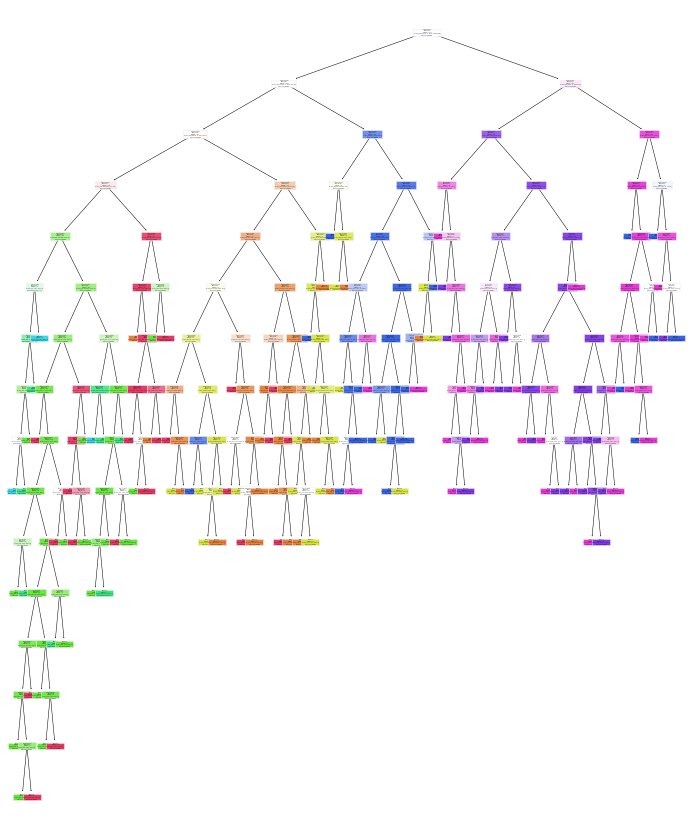

In [73]:
clf_DecisionTree.fit(X_train, y_train)

# Visualizar a árvore de decisão
plt.style.use('ggplot')
plt.figure(figsize=(12, 15))
plot_tree(clf_DecisionTree, feature_names= list(data.columns), class_names=list(data['Label']),filled=True)

y_pred = clf_DecisionTree.predict(X_test)

# Avaliação do modelo segundo o método de k-fold cross validation
# cv=10 significa que o conjunto de dados será dividido em 10 partes iguais. 
# O modelo será treinado em 9 partes e testado na parte restante.

# Acurácia (Exercício 1.a)
scores = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='accuracy')
mean_accuracy_DecisionTree = scores.mean().round(4)
std_accuracy_DecisionTree = scores.std().round(4)
scores_DecisionTree = scores
print(f"Acurácia média: {mean_accuracy_DecisionTree}")
print(f"Desvio padrão: {std_accuracy_DecisionTree}")
print(f"Scores: {scores_DecisionTree}")

# Recall, Precision e F1 (Exercício 1.b)
scores_recall = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='recall_weighted')
scores_precision = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='precision_weighted')
scores_f1 = cross_val_score(clf_DecisionTree, X, y, cv=10, scoring='f1_weighted')
recall_DecisionTree = scores_recall.mean().round(4)
precision_DecisionTree = scores_precision.mean().round(4)
f1_DecisionTree = scores_f1.mean().round(4)

print(f"Recall: {recall_DecisionTree}")
print(f"Precision: {precision_DecisionTree}")
print(f"F1: {f1_DecisionTree}")

In [74]:
# Hipótese nula: as acurácias são iguais
# Hipótese alternativa: as acurácias são diferentes

# Teste de hipótese entre Decision Tree e MLP
t_stat, p_value = stats.ttest_rel(scores_DecisionTree, scores_MLP)
print("t-statistic: ", t_stat)
print(f"p-value: {p_value}")

if p_value < nível_de_significância:
    print("Rejeitar a hipótese nula: as acurácias são diferentes")
else:
    print("Aceitar a hipótese nula: as acurácias são iguais")

t-statistic:  -3.1249344232385075
p-value: 0.0122210452403434
Rejeitar a hipótese nula: as acurácias são diferentes


## 3. Estude a capacidade preditiva relativamente ao atributo “Genero” usando os métodos:

* Rede Neuronal;
* SVM

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x = data.drop("Genero", axis=1)
x = x.apply(le.fit_transform)

y = data['Genero']
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)


In [4]:
import numpy as np

def normalize(y):
    y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    return y_norm

data_norm = data.copy()
data_norm['Idade'] = normalize(data['Idade'])
data_norm['Altura'] = normalize(data['Altura'])
data_norm['Peso'] = normalize(data['Peso'])
data_norm['FCV'] = normalize(data['FCV'])
data_norm['NRP'] = normalize(data['NRP'])
data_norm['CA'] = normalize(data['CA'])
data_norm['FAF'] = normalize(data['FAF'])
data_norm['TUDE'] = normalize(data['TUDE'])

data_norm['Genero'] = le.fit_transform(data['Genero'])
data_norm['Historico_obesidade_familiar'] = le.fit_transform(data['Historico_obesidade_familiar'])
data_norm['FCCAC'] = le.fit_transform(data['FCCAC'])
data_norm['CCER'] = le.fit_transform(data['CCER'])
data_norm['Fumador'] = le.fit_transform(data['Fumador'])
data_norm['MCC'] = le.fit_transform(data['MCC'])
data_norm['CBA'] = le.fit_transform(data['CBA'])
data_norm['TRANS'] = le.fit_transform(data['TRANS'])
data_norm['Label'] = le.fit_transform(data['Label'])

#data_norm = data_norm.iloc[:, data_norm.columns != 'Genero']
#data_norm = data_norm.iloc[:, data_norm.columns == 'Genero']
data_norm

,Genero,Idade,Altura,Peso,Historico_obesidade_familiar,FCCAC,FCV,NRP,CCER,Fumador,CA,MCC,FAF,TUDE,CBA,TRANS,Label
0,0,0.148936,0.320755,0.186567,1,0,0.5,0.666667,2,0,0.500000,0,0.000000,0.500000,1,4,8
1,0,0.148936,0.132075,0.126866,1,0,1.0,0.666667,2,1,1.000000,1,1.000000,0.000000,2,4,8
2,1,0.191489,0.660377,0.283582,1,0,0.5,0.666667,2,0,0.500000,0,0.666667,0.500000,0,4,8
3,1,0.276596,0.660377,0.358209,0,0,1.0,0.666667,2,0,0.500000,0,0.666667,0.000000,0,2,0
4,1,0.170213,0.622642,0.379104,0,0,0.5,0.000000,2,0,0.500000,0,0.000000,0.000000,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.148443,0.491943,0.689616,1,1,1.0,0.666667,2,0,0.364070,0,0.558756,0.453124,2,4,6
2107,0,0.169850,0.563366,0.707037,1,1,1.0,0.666667,2,0,0.502565,0,0.447130,0.299635,2,4,6
2108,0,0.181362,0.570200,0.706637,1,1,1.0,0.666667,2,0,0.527097,0,0.471403,0.323144,2,4,6
2109,0,0.220467,0.546132,0.704079,1,1,1.0,0.666667,2,0,0.926170,0,0.379702,0.293017,2,4,6


### Rede Neuronal

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

nn_hiden_layers = [1, 3, 5, 10, [5,5], [7,3]]
approaches = list()

for iteration in range(10):
    for nn_hiden_layer in nn_hiden_layers:
        nn = MLPRegressor(hidden_layer_sizes=nn_hiden_layer, activation='tanh', solver='lbfgs', max_iter=10000, learning_rate_init=0.001)

        nn.fit(x_train, y_train)

        pred = nn.predict(x_test)

        test_set_rsquared = nn.score(x_test, y_test)
        test_set_rsme = np.sqrt(mean_squared_error(y_test, pred))
        print(f"R^2 on {nn_hiden_layer} layers: {test_set_rsquared}")   
        print(f"RSME on {nn_hiden_layer}: {test_set_rsme}") 
        print('====================================')   
        approaches.append([nn_hiden_layer, test_set_rsquared, test_set_rsme])   
    
# Funciona so com a lista sem outras listas dentro
# Preparação e ordenação dos resultados
approaches_results_ordered = dict()
for a in nn_hiden_layers:
    a = str(a)
    approaches_results_ordered.update({a: []})
    
for a in approaches:
    approaches_results_ordered[str(a[0])].append(a[1:])

# Media dos resultados
mean_results = dict()
for key, value in approaches_results_ordered.items():
    mean_results.update({key: np.mean(value, axis=0)})
    

best_nn = max(mean_results.items(), key=lambda x: x[1][0])
print(f'Melhor resultado por R^2: {best_nn}')
print(f'Melhor resultado por RSME: {best_nn}')

R^2 on 1 layers: -0.02570126347783641
RSME on 1: 0.5025376265776809
R^2 on 3 layers: 0.2621314402296858
RSME on 3: 0.42623356047276795
R^2 on 5 layers: -0.004186522453852648
RSME on 5: 0.4972391703897286
R^2 on 10 layers: 0.4158773692563257
RSME on 10: 0.37923652228760607
R^2 on [5, 5] layers: 0.11908284474580066
RSME on [5, 5]: 0.4657208408415908
R^2 on [7, 3] layers: 0.31598239762667446
RSME on [7, 3]: 0.41038528305159955
R^2 on 1 layers: -0.021776621950579944
RSME on 1: 0.5015752750817853
R^2 on 3 layers: 0.0925148179347921
RSME on 3: 0.47269162779015594
R^2 on 5 layers: 0.1215156216357468
RSME on 5: 0.4650773193678237
R^2 on 10 layers: 0.38536061631801677
RSME on 10: 0.3890167770063925
R^2 on [5, 5] layers: 0.3673777485813884
RSME on [5, 5]: 0.39466659679072097
R^2 on [7, 3] layers: 0.2839210596522619
RSME on [7, 3]: 0.4198929566639734
R^2 on 1 layers: 0.30707647814440253
RSME on 1: 0.41304825438429327
R^2 on 3 layers: -0.022358946208600683
RSME on 3: 0.5017181819757587
R^2 on 5 la

### SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

In [ ]:
predict_l = clf.predict(x_test)
accuracy_l = ('Linear',accuracy_score(y_test, predict_l))
print(f"Accuracy: {accuracy_l}")

In [ ]:
clf_p = SVC(kernel='poly')
clf_p.fit(x_train, y_train)

In [ ]:
predict_p = clf_p.predict(x_test)
accuracy_p = ('poly', accuracy_score(y_test, predict_p))
print(f"Accuracy: {accuracy_p}")

In [ ]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(x_train, y_train)

In [ ]:
predict_rbf = clf_rbf.predict(x_test)
accuracy_rbf = ('rbf', accuracy_score(y_test, predict_rbf))
print(f"Accuracy: {accuracy_rbf}")

In [ ]:
clf_sigmoid = SVC(kernel='sigmoid')
clf_sigmoid.fit(x_train, y_train)

In [ ]:
predict_sigmoid = clf_sigmoid.predict(x_test)
accuracy_sigmoid = ('sigmoid', accuracy_score(y_test, predict_sigmoid))
print(f"Accuracy: {accuracy_sigmoid}")

In [ ]:
print('Best by Accuracy')
best_svc = max([accuracy_l, accuracy_p, accuracy_rbf, accuracy_sigmoid], key=lambda x: x[1])
print(best_svc)


### 3. a) Usando o método k-fold cross validation obtenha a média e o desvio padrão da taxa de acerto da previsão do atributo “Genero” com os dois melhores modelos obtidos na alínea anterior.


In [ ]:
from sklearn.model_selection import KFold 
k = 10
folds = np.random.choice(k, len(data_norm), replace=True)
print(pd.Series(folds).value_counts())
cv_error = np.zeros(k)
cv_error

In [ ]:
nHidden = 5
for i in range(10):
    train_cv = data_norm[folds != i]
    test_cv = data_norm[folds == i]
    
    nn = MLPRegressor(hidden_layer_sizes=nHidden, activation='tanh', solver='lbfgs', max_iter=10000, learning_rate_init=0.001)
    
    nn.fit(train_cv.iloc[:, train_cv.columns != 'Genero'], train_cv.iloc[:, train_cv.columns == 'Genero'])
    nn_pred = nn.predict(test_cv.iloc[:, test_cv.columns != 'Genero'])
    
    cv_error[i-1] = np.sqrt(mean_squared_error(test_cv.iloc[:, test_cv.columns == 'Genero'], nn_pred))

In [ ]:
# Media e desvio padrão dos erros
mean_cv_error = np.mean(cv_error)
sd_cv_error = np.std(cv_error)

print(f"Mean CV Error: {mean_cv_error}")
print(f"SD CV Error: {sd_cv_error}")

In [ ]:
svc_score = cross_val_score(clf_rbf, x, y, cv=10)
print('SVC')
print('=================================================')
print(f"Acurácia média: {svc_score.mean()}")
print(f"Desvio padrão: {svc_score.std()}")
print(f"Scores: {svc_score}")
print('=================================================')

### 3. b) Verifique se existe diferença significativa no desempenho dos dois melhores modelos obtidos anteriormente (use um nível de significância de 5%).

### 3. c) Compare os resultados dos modelos. Identifique o modelo que apresenta o melhor desempenho, de acordo com os critérios: 
* Accuracy
* Sensitivity
* Specificity 
* F1.